In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import matplotlib.pylab as plt
# '-' 깨짐 해결 모듈
import matplotlib as mpl

plt.rcParams["font.family"] = "Malgun Gothic"  # For Windows
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (8,4)
print(plt.rcParams["font.family"])

# 마이너스 깨짐 해결
mpl.rcParams["axes.unicode_minus"] = False

['Malgun Gothic']


1인가구 데이터
     시    구     동   가구수
0  서울시  관악구  보라매동  2689
1  서울시  관악구   청림동   986
2  서울시  관악구   행운동  6353
3  서울시  관악구  낙성대동  4383
4  서울시  관악구   중앙동  2475

노령인구 데이터
                         행정구역 2024년_계_60~69세 2024년_계_70~79세 2024년_계_80~89세  \
0      서울특별시 관악구 (1162000000)         60,569         38,976         18,024   
1  서울특별시 관악구 보라매동(1162052500)          3,354          2,187          1,030   
2   서울특별시 관악구 청림동(1162054500)          2,036          1,277            688   
3   서울특별시 관악구 성현동(1162056500)          3,966          2,613          1,272   
4   서울특별시 관악구 행운동(1162057500)          3,231          2,172            939   

  2024년_계_90~99세  2024년_계_100세 이상  
0          1,983               50  
1            133                3  
2            103                2  
3            128                5  
4             94                2  

처리된 노령인구 데이터
      동  노령인구수
1  보라매동   6707
2   청림동   4106
3   성현동   7984
4   행운동   6438
5  낙성대동   2858

병합된 데이터
      동  1인가구수  노령인구수
0  보라매동   2689   

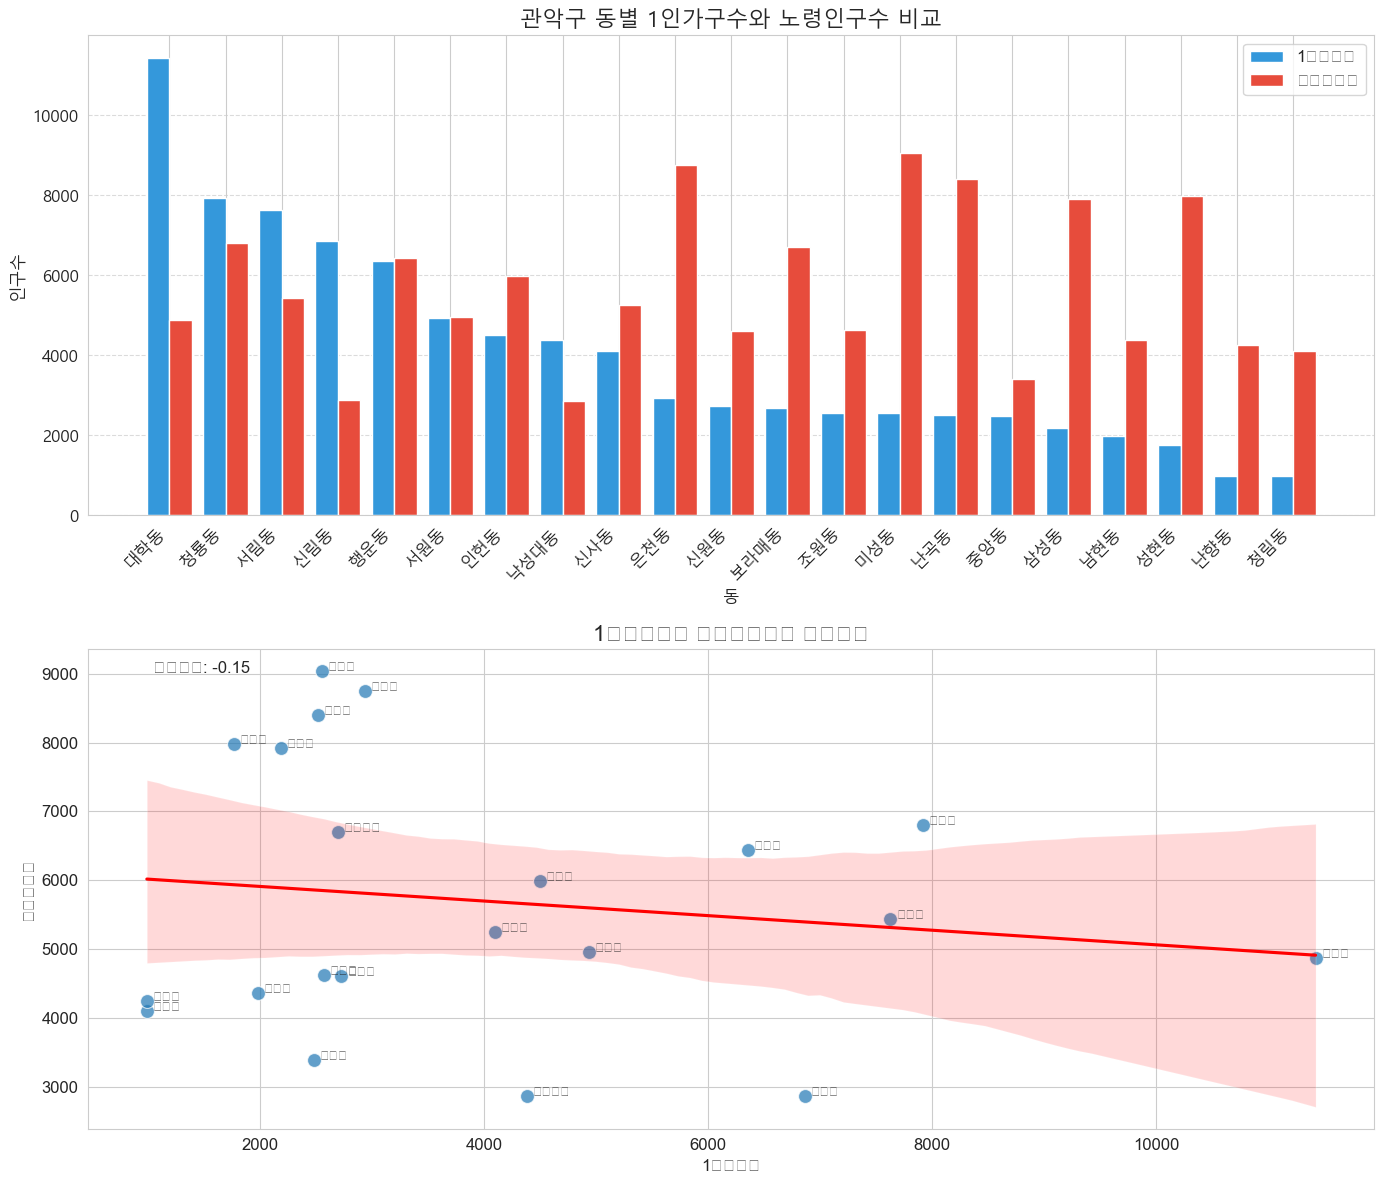


가장 많은 1인가구가 있는 동:
      동  1인가구수  노령인구수
14  대학동  11422   4870
17  청룡동   7916   6802
9   서림동   7625   5433

가장 많은 노령인구가 있는 동:
      동  1인가구수  노령인구수
20  미성동   2548   9045
15  은천동   2932   8756
18  난곡동   2516   8396

노령인구 대비 1인가구 비율:
       동  1인가구수  노령인구수  비율(노령인구/1인가구)
16   성현동   1760   7984       4.536364
12   난향동    989   4246       4.293225
1    청림동    986   4106       4.164300
19   삼성동   2185   7915       3.622426
20   미성동   2548   9045       3.549843
18   난곡동   2516   8396       3.337043
15   은천동   2932   8756       2.986357
0   보라매동   2689   6707       2.494236
6    남현동   1975   4367       2.211139
13   조원동   2564   4621       1.802262
8    신원동   2723   4604       1.690782
4    중앙동   2475   3392       1.370505
5    인헌동   4496   5988       1.331851
10   신사동   4094   5250       1.282364
2    행운동   6353   6438       1.013380
7    서원동   4933   4957       1.004865
17   청룡동   7916   6802       0.859272
9    서림동   7625   5433       0.712525
3   낙성대동   4383   2858       0.652065
14   대학동

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1인가구 데이터 불러오기
single_household_df = pd.read_csv('datas_team/관악구 1인가구.csv')
print("1인가구 데이터")
print(single_household_df.head())

# 노령인구 데이터 불러오기
elderly_df = pd.read_csv('datas_team/gwan_df_clean.csv')
print("\n노령인구 데이터")
print(elderly_df.head())

# 노령인구 데이터 전처리
# 행정구역에서 동 이름만 추출 (예: '서울특별시 관악구 보라매동(1162052500)' -> '보라매동')
elderly_df['동'] = elderly_df['행정구역'].str.extract(r'서울특별시 관악구 (.+?)\(')
elderly_df['동'] = elderly_df['동'].str.strip()

# 노령인구 컬럼의 데이터 타입을 확인하고 수치형으로 변환
# 문자열로 되어 있는 숫자들을 정수형으로 변환 (콤마 제거)
elderly_columns = ['2024년_계_60~69세', '2024년_계_70~79세', '2024년_계_80~89세', '2024년_계_90~99세', '2024년_계_100세 이상']
for col in elderly_columns:
    elderly_df[col] = elderly_df[col].astype(str).str.replace(',', '').astype(int)

# 노령인구 수 계산 (60세 이상)
elderly_df['노령인구수'] = elderly_df[elderly_columns].sum(axis=1)

# 관악구 전체 행 제거 (첫 번째 행)
elderly_df = elderly_df[elderly_df['동'].notna()]

# 필요한 열만 선택
elderly_selected = elderly_df[['동', '노령인구수']]
print("\n처리된 노령인구 데이터")
print(elderly_selected.head())

# 1인가구 데이터에서 필요한 열만 선택
single_selected = single_household_df[['동', '가구수']]

# 데이터 병합
merged_df = pd.merge(single_selected, elderly_selected, on='동', how='inner')
merged_df = merged_df.rename(columns={'가구수': '1인가구수'})
print("\n병합된 데이터")
print(merged_df.head())

# 데이터 시각화
plt.figure(figsize=(14, 12))

# 1인가구수 기준으로 정렬
sorted_df = merged_df.sort_values(by='1인가구수', ascending=False)

# 1. 막대 그래프 - 1인가구수와 노령인구수 비교
plt.subplot(2, 1, 1)
sns.set_style("whitegrid")
bar_width = 0.4
x = np.arange(len(sorted_df))

plt.bar(x - bar_width/2, sorted_df['1인가구수'], width=bar_width, color='#3498db', label='1인가구수')
plt.bar(x + bar_width/2, sorted_df['노령인구수'], width=bar_width, color='#e74c3c', label='노령인구수')

plt.xlabel('동')
plt.ylabel('인구수')
plt.title('관악구 동별 1인가구수와 노령인구수 비교', fontsize=16)
plt.xticks(x, sorted_df['동'], rotation=45, ha='right')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 2. 상관관계 산점도
plt.subplot(2, 1, 2)
sns.scatterplot(data=merged_df, x='1인가구수', y='노령인구수', s=100, alpha=0.7)

# 각 점에 동 이름 추가
for i, row in merged_df.iterrows():
    plt.text(row['1인가구수']+50, row['노령인구수'], row['동'], fontsize=9)
    
# 추세선 추가
sns.regplot(data=merged_df, x='1인가구수', y='노령인구수', scatter=False, color='red')

plt.title('1인가구수와 노령인구수의 상관관계', fontsize=16)
plt.xlabel('1인가구수')
plt.ylabel('노령인구수')

# 상관계수 계산
correlation = merged_df['1인가구수'].corr(merged_df['노령인구수'])
plt.annotate(f'상관계수: {correlation:.2f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12)

plt.tight_layout()
plt.savefig('gwanak_analysis.png', dpi=300)
plt.show()

# 통계 분석
print("\n가장 많은 1인가구가 있는 동:")
print(merged_df.sort_values(by='1인가구수', ascending=False).head(3))

print("\n가장 많은 노령인구가 있는 동:")
print(merged_df.sort_values(by='노령인구수', ascending=False).head(3))

# 1인가구수와 노령인구수의 비율 계산
merged_df['비율(노령인구/1인가구)'] = merged_df['노령인구수'] / merged_df['1인가구수']
print("\n노령인구 대비 1인가구 비율:")
print(merged_df.sort_values(by='비율(노령인구/1인가구)', ascending=False))